In [1]:
import numpy as np
import Analysis_source as src
from importlib import reload

# Input files and colors

In [2]:
colors_btime = {'DOP' : (0.0,0.4,1.0),\
                'DON' : (0.0,0.8,1.0),\
                'SER' : (1.0,0.3,0.0),\
                'SEN' : (1.0,0.6,0.0),\
                'PHC' : (0.0,0.2,0.0),\
                'PHN' : (0.0,0.4,0.0),\
                'PHE' : (0.0,0.6,0.0),\
                'PHA' : (0.0,0.8,0.0)}
colors_btime = {key: tuple(min(1.4*(c+(np.mean(col)-c)/2.), 1) for c in col) for key, col in colors_btime.items()}

In [3]:
fnames = {"SER_H" : "BTIMES_resSTD/NP22ser-53_PRO1-5_btimes_resSTD.sfu",
          "PHE_H" : "BTIMES_resSTD/NP22phe-53_PRO1-4_btimes_resSTD.sfu",
          "DOP_H" : "BTIMES_resSTD/NP22dop-53_PRO1-4_btimes_resSTD.sfu",
          "DON_H" : "BTIMES_resSTD/NP22don-53_PRO1-11_btimes_resSTD.sfu",
          "SEN_H" : "BTIMES_resSTD/NP22sen-53_PRO1-11_btimes_resSTD.sfu",
          "PHC_H" : "BTIMES_resSTD/NP22phc-53_PRO1-11_btimes_resSTD.sfu",
          "PHN_H" : "BTIMES_resSTD/NP22phn-53_PRO1-11_btimes_resSTD.sfu",
          "PHA_H" : "BTIMES_resSTD/NP22pha-53_PRO1-11_btimes_resSTD.sfu"}

# Import data

In [4]:
reload(src)

<module 'Analysis_source' from '/DATA/PHD/WaterSTD/Analysis_source.py'>

In [5]:
btimes = {key[:3] : src.import_events(fname, resSTD=True)[key] for key, fname in fnames.items()}
keys = btimes.keys()

100%|██████████| 389/389 [00:00<00:00, 308486.34it/s]

Importing BTIMES_resSTD/NP22ser-53_PRO1-5_btimes_resSTD.sfu


Importing BTIMES_resSTD/NP22phe-53_PRO1-4_btimes_resSTD.sfu


100%|██████████| 1132/1132 [00:00<00:00, 207578.90it/s]


Importing BTIMES_resSTD/NP22dop-53_PRO1-4_btimes_resSTD.sfu
Importing BTIMES_resSTD/NP22don-53_PRO1-11_btimes_resSTD.sfu
Importing BTIMES_resSTD/NP22sen-53_PRO1-11_btimes_resSTD.sfu


100%|██████████| 1163/1163 [00:00<00:00, 256681.52it/s]


Importing BTIMES_resSTD/NP22phc-53_PRO1-11_btimes_resSTD.sfu
Importing BTIMES_resSTD/NP22phn-53_PRO1-11_btimes_resSTD.sfu


100%|██████████| 1472/1472 [00:00<00:00, 529276.94it/s]

Importing BTIMES_resSTD/NP22pha-53_PRO1-11_btimes_resSTD.sfu


In [6]:
#btimes = {key : compress_chemical_positions(val, propname=None) for key, val in btimes.items()}

# Plotting

In [7]:
for key, val in btimes.items():
    print(key, val["dt"].min(), val["dt"].max())

SER 0.02 688.82
PHE 0.02 187.86
DOP 0.02 360.98
DON 0.02 272.12
SEN 0.02 494.0
PHC 0.02 469.38
PHN 0.02 322.3
PHA 0.02 259.12


SER


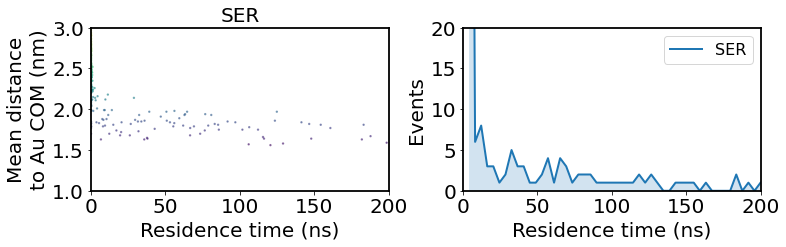

PHE


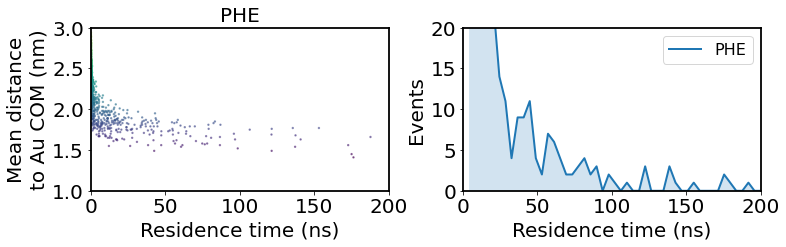

DOP


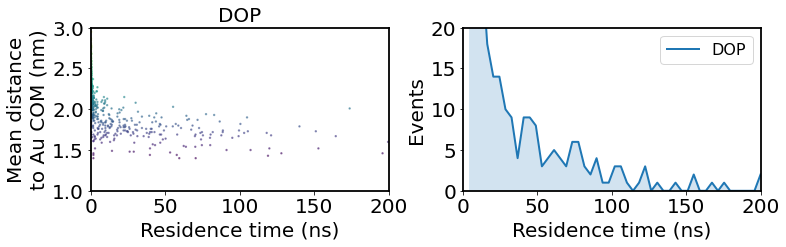

DON


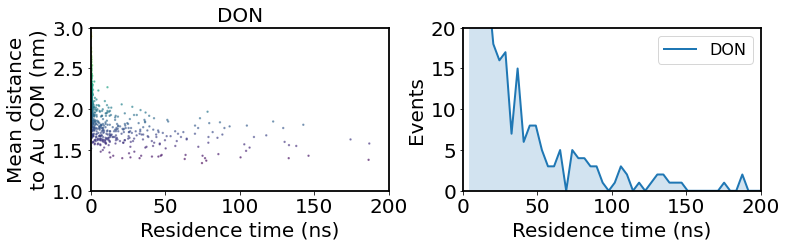

SEN


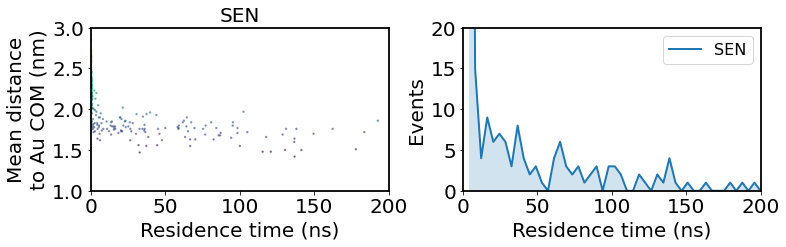

PHC


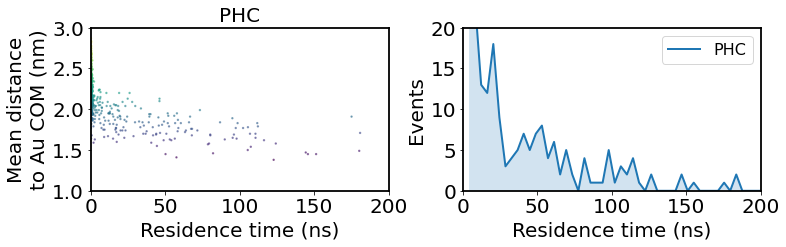

PHN


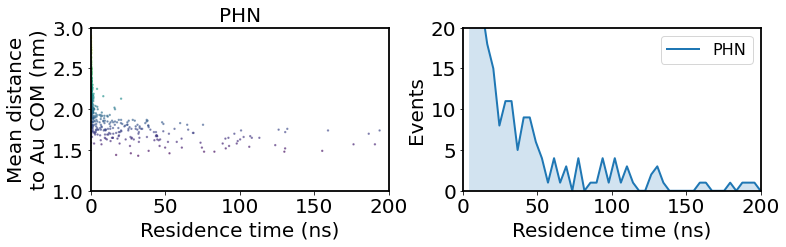

PHA


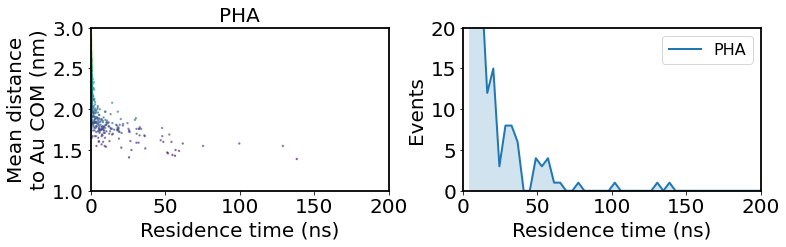

In [8]:
for key in keys:
    src.plot_btime(key, btimes=btimes, ignore_ns=0, xlim=(0,200), ylim=(1,3))

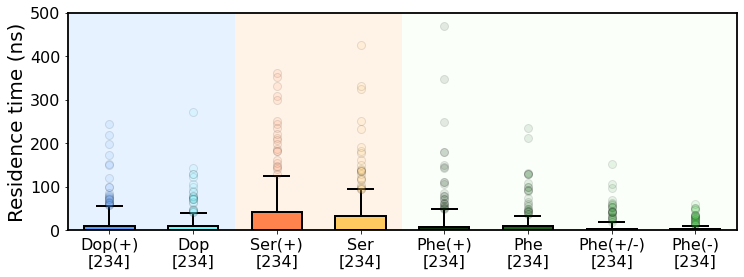

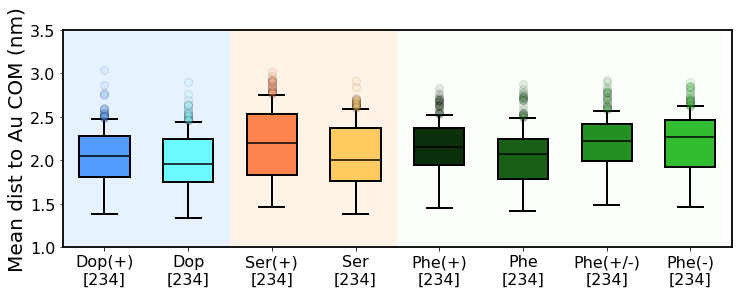

In [9]:
src.prop_boxplot("dt", ignore_ns=0., btimes=btimes, colors=colors_btime, ylim=(0,500), ylabel='Residence time (ns)', nticks=6, normdistr=True)
src.prop_boxplot("dist", ignore_ns=0., btimes=btimes, colors=colors_btime, ylim=(1,3.5), ylabel='Mean dist to Au COM (nm)', nticks=6, normdistr=True)

In [10]:
groups = [['SER', 'DOP'],
         ['SER', 'PHE'],
         ['DOP', 'PHE']]
#for group in groups:
#    src.plot_cluster(group, btimes=btimes, colors=colors_btime, xlim=(0,20), ylim=(1,2.5), ignore_ns=0.5)

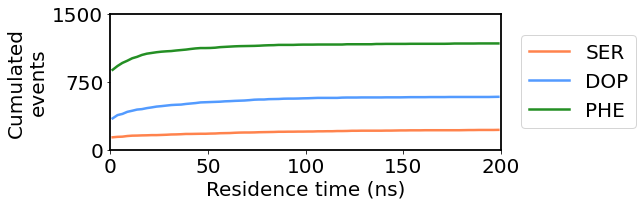

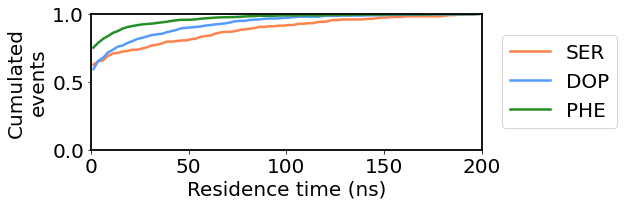

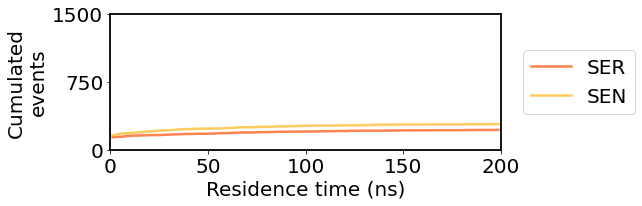

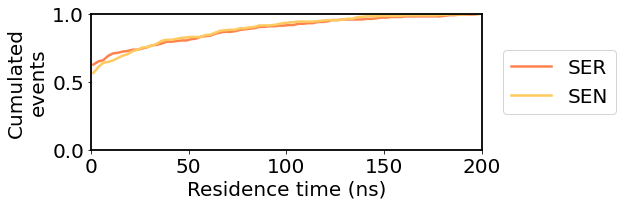

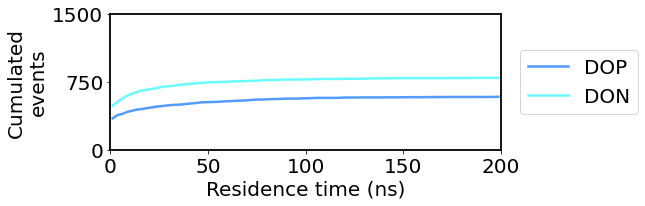

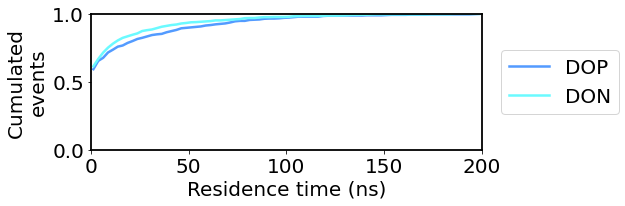

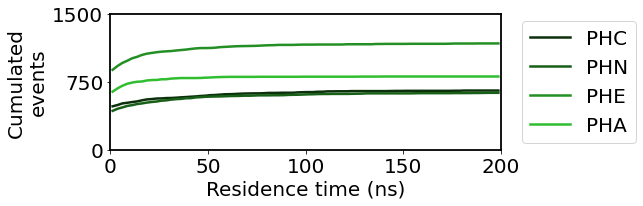

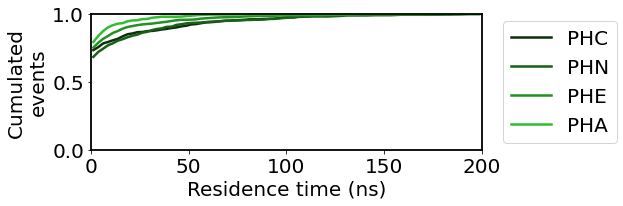

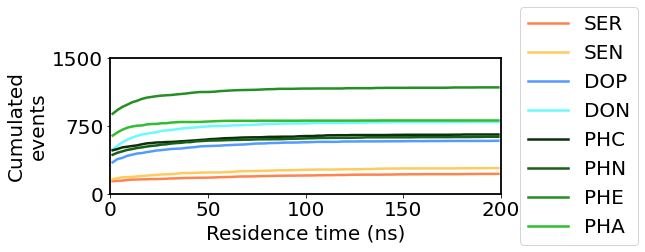

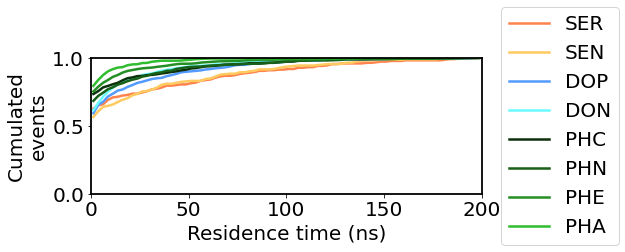

In [11]:
groups = [['SER', 'DOP', 'PHE'],
          ['SER', 'SEN'],
          ['DOP', 'DON'],
          ['PHC', 'PHN', 'PHE', 'PHA'],
          ['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA']] 

for group in groups:
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,1500), xlim=(0,200), ignore_ns=0)
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,1), xlim=(0,200), ignore_ns=0, normed=True)

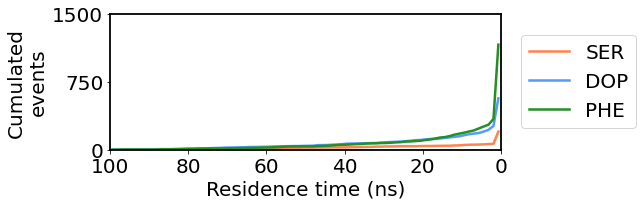

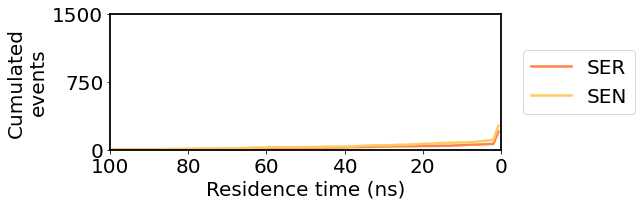

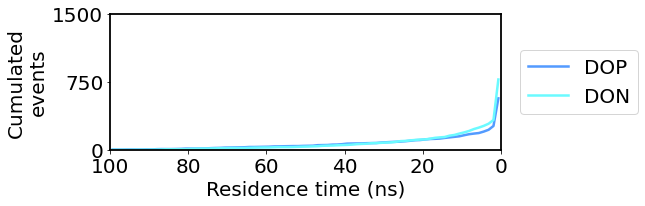

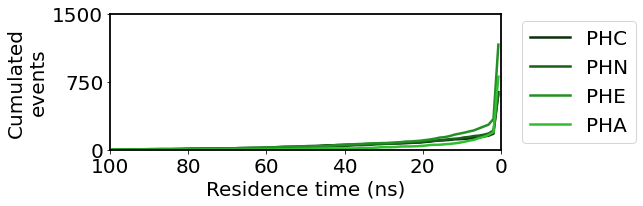

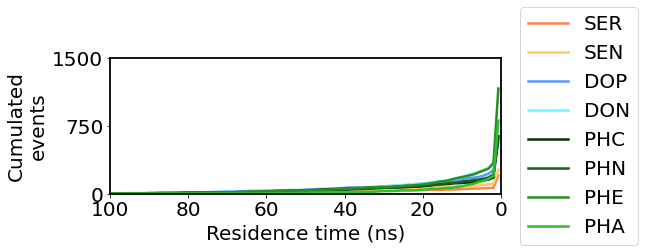

In [12]:
groups = [['SER', 'DOP', 'PHE'],
          ['SER', 'SEN'],
          ['DOP', 'DON'],
          ['PHC', 'PHN', 'PHE', 'PHA'],
          ['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA']] 

for group in groups:
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,1500), xlim=(100,0), ignore_ns=0.)